# Hyper Parameter Optimization

* After applying the ml models if we want to increase the accuracy score more we can use Hyper Parameter Optimization techniques

* problems in train test split are overcomed using cross validation

* In ML models we need to select so many parameters to check which which is the best parameter we can tune the parameters and check which are the best

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.shape

(200, 4)

In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
X = df.iloc[:, :3]
y = df.iloc[:, -1]

#### Train Test split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [8]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

0.8892839125258919


# 1) Cross Validation 

We apply cross validation because when we apply the train test split it randomly picks some data and it will give the result that leads to diffrent accuracy score when we run the model and for same data if we run in other computer that gives diffrent accuracy score so To get the same accuracy score and split the data in some format we use Cross validation

- to get good model we use cv = 3
- to get better model we use cv = 5
- to get best model we use cv = 9

<img src="cv image.png" width = 500 />

Here we split the data into five groups, and use each of them in turn to evaluate the model fit on the other 4/5 of the data. This would be rather tedious to do by hand, and so we can use Scikit-Learn's cross_val_score convenience routine to do it succinctly:

In [9]:
## applying cv for linear regression
from sklearn.model_selection import cross_val_score
score = cross_val_score(linreg, X, y, cv=5)
score

array([0.87556263, 0.93177791, 0.92150403, 0.84554586, 0.90247132])

Above are the scores for cv = 5

In [10]:
## applying cv for linear regression
from sklearn.model_selection import cross_val_score

mse = cross_val_score(linreg, X, y, scoring = 'neg_mean_squared_error', cv = 5)

mean_mse = np.mean(mse)

print(mean_mse)

-2.8582430099910097


Here we have calculated the mean squared error, if mse is nearer to 1 then model is very good

# 2) Validation Curve

* mostly not recomended because other techniques are better than this

In [11]:
# Doing Polynomial regression by considering degree as 2
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def poly(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

plr_model = poly(2)
plr_model.fit(X_train, y_train)

y_predict = plr_model.predict(X_test)

from sklearn.metrics import r2_score
accuracy = r2_score(y_test, y_predict)
print(accuracy)

0.9152194256050297


To check the best degree of polynomial we can use validation curve

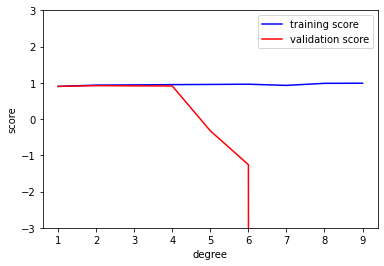

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve

def poly(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))


degree = np.arange(0, 10)
train_score, val_score = validation_curve(poly(), X, y,
                                          'polynomialfeatures__degree', degree, cv=5)

# print(val_score)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(-3, 3)
plt.xlabel('degree')
plt.ylabel('score');

As you can see in the above graph from 1 to 4 training score and validation score graph are near after that validation score is decresing, so better to use degree as 1 or 2 or 3 or 4

# 3) GridSearch CV

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(poly(), param_grid, cv=7)

grid.fit(X, y)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__normalize': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [14]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 2}

As this grid gives the best parameters , we can use degree as  2 ('polynomialfeatures__degree': 2)

# 4) RandomizedSearchCV

* Mostly we use this to select the best parameters 

In [15]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr_model = rfr.fit(X_train, y_train)

y_pred = rfr_model.predict(X_test)

from sklearn.metrics import r2_score
accuracy = r2_score(y_test, y_pred)
print(accuracy)

0.9250739293496916


In [ ]:
# As we can see the RandomForestRegressorhas these many parameters to select the best value in this parameters we can use randomized search cv
# Just for now we select some parameters (n_estimators,max_features,max_depth,min_samples_split,min_samples_leaf) and apply randomized search cv

RandomForestRegressor(
    n_estimators=100,
    *,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
)

In [16]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [17]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [18]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [19]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.1s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   47.6s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [20]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [21]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=5,
                      n_estimators=400)

In [22]:
rf_random.best_score_

-2.298754688662483

In [23]:
best_rf_model = RandomForestRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=5,n_estimators=400,max_features = 'auto')

In [24]:
best_rf_model.fit(X_train, y_train)

y_predict = best_rf_model.predict(X_test)

from sklearn.metrics import r2_score
accuracy = r2_score(y_test, y_predict)
print(accuracy)

0.9004420375220841
